In [3]:
from __future__ import absolute_import
from __future__ import print_function
import numpy as np
np.random.seed(1337)

from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop, Adagrad
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU
from keras.datasets import imdb
from keras import backend as K

from theano import function

Using Theano backend.


In [6]:
print("Loading data...")
max_features = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [8]:
print("Pad sequences(samples x time)")
maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Pad sequences(samples x time)
X_train shape: (25000, 500)
X_test shape: (25000, 500)


In [9]:
print("Build model..")
model = Sequential()
model.add(Embedding(max_features, 128, input_length = maxlen))

Build model..


In [10]:
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=["accuracy"])
print("Train..")
batch_size = 30
score = model.fit(X_train, y_train, batch_size = batch_size,
          nb_epoch = 4, validation_data = (X_test, y_test))

Train..
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 1224s - loss: 0.3778 - acc: 0.8353 - val_loss: 0.3857 - val_acc: 0.8345
Epoch 2/4
25000/25000 [==============================] - 1157s - loss: 0.3204 - acc: 0.8697 - val_loss: 0.5001 - val_acc: 0.7509
Epoch 3/4
25000/25000 [==============================] - 2144s - loss: 0.2639 - acc: 0.8935 - val_loss: 0.3063 - val_acc: 0.8739
Epoch 4/4
25000/25000 [==============================] - 2257s - loss: 0.2117 - acc: 0.9189 - val_loss: 0.3256 - val_acc: 0.8778


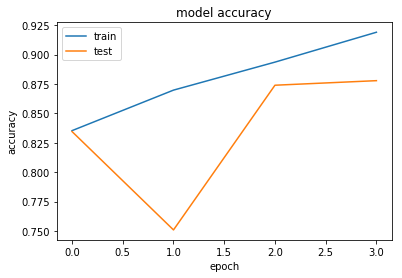

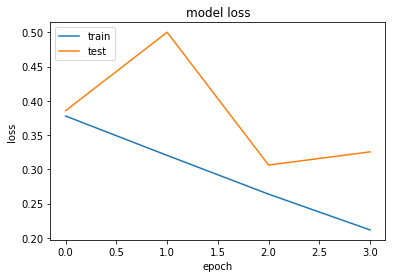

In [16]:
import matplotlib.pyplot as plt

plt.plot(score.history['acc'])
plt.plot(score.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(score.history['loss'])
plt.plot(score.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()